In [1]:
from transit import * 

c:\Users\Admin\anaconda33\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\Admin\anaconda33\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\Admin\anaconda33\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


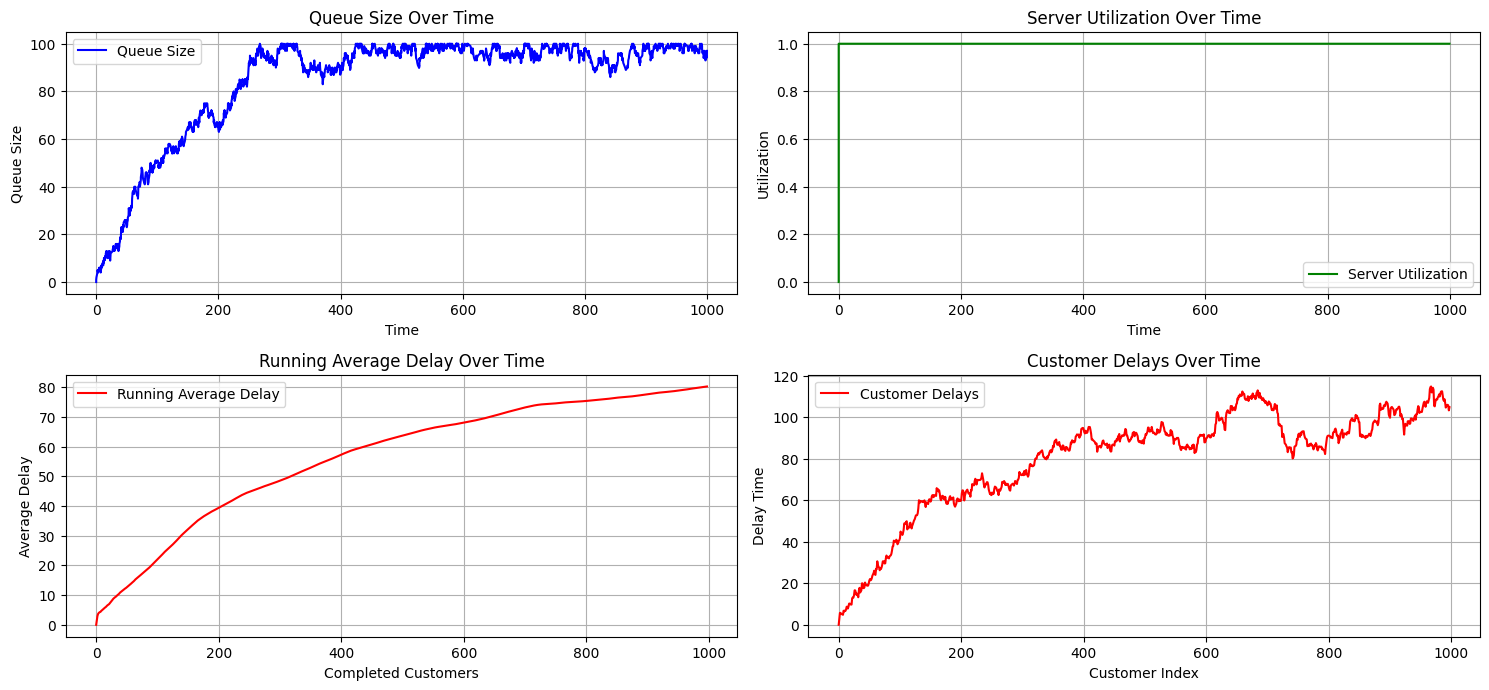


Simulation Summary

Overall Statistics:
Total customers: 0
Completed customers: 997
Rejected customers: 144
Active customers: 0
Average delay: 80.31 ± 24.93 time units

Server Utilization:
Final utilization: 1.00
Average utilization: 1.00

Queue Statistics:
Average queue size: 83.38
Maximum queue size: 100


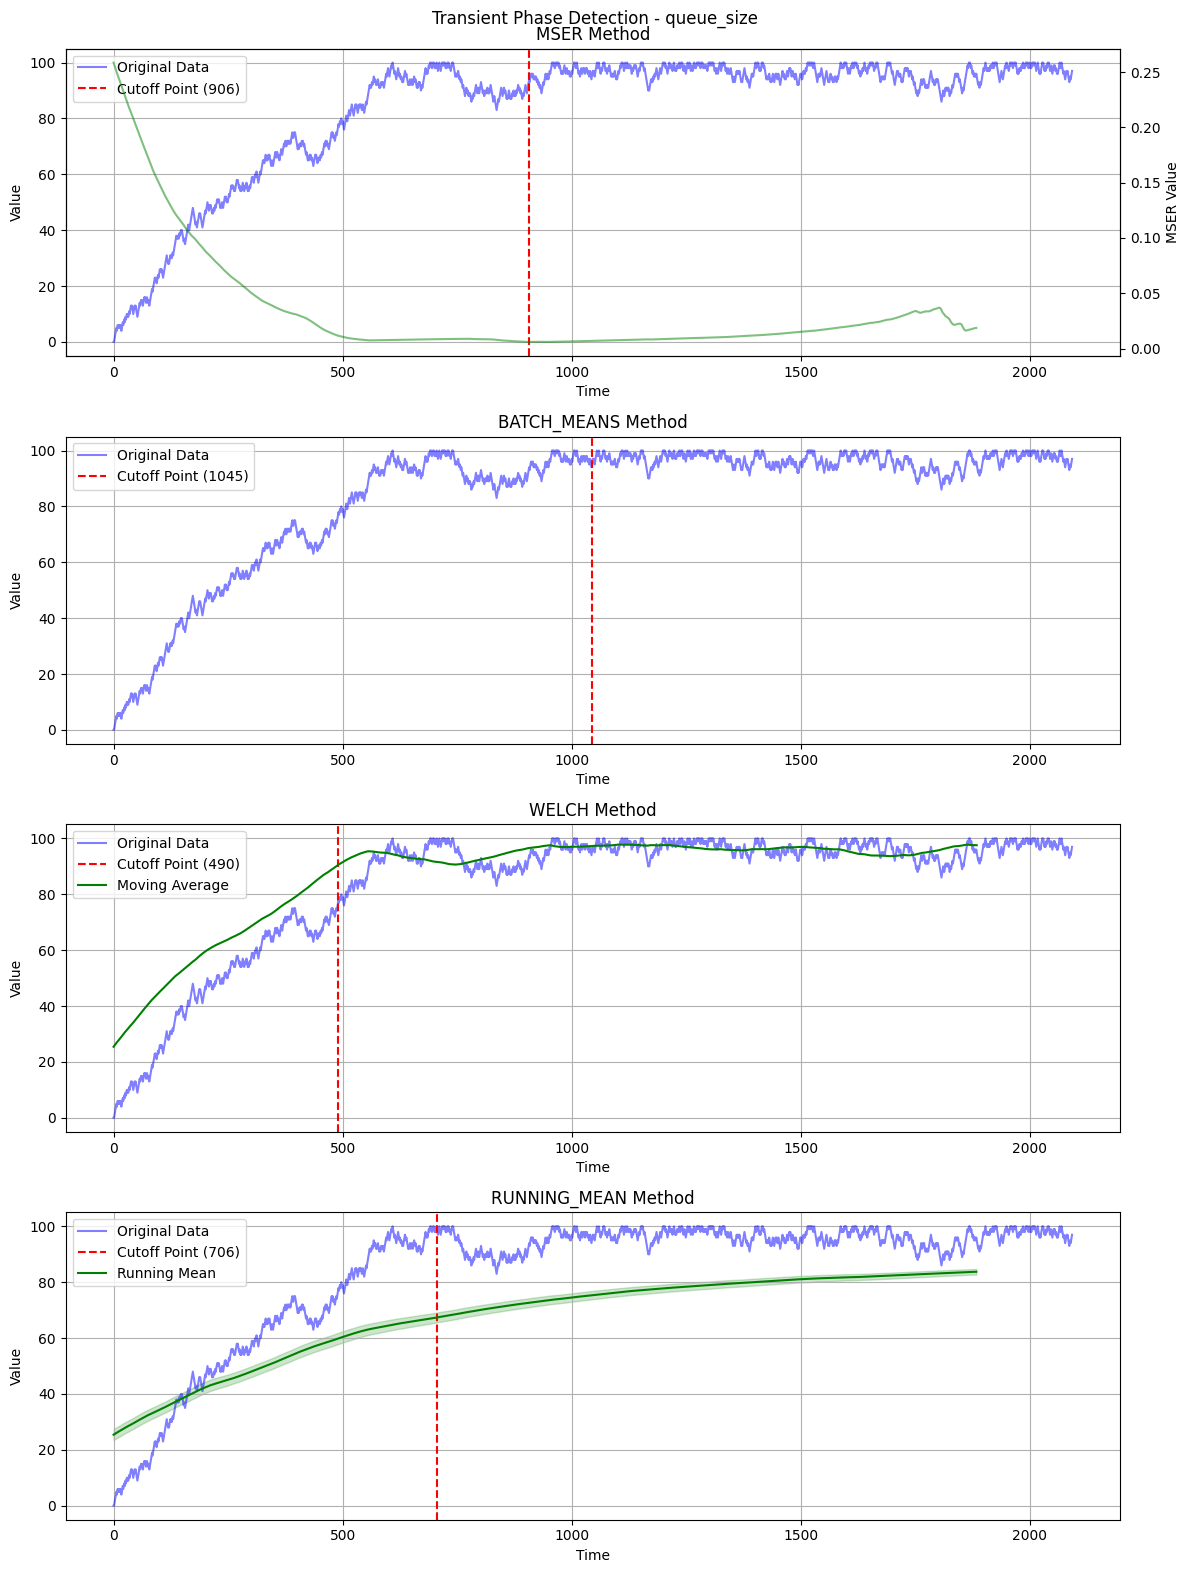

/Users/erfanbayat/anaconda3/lib/python3.11/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


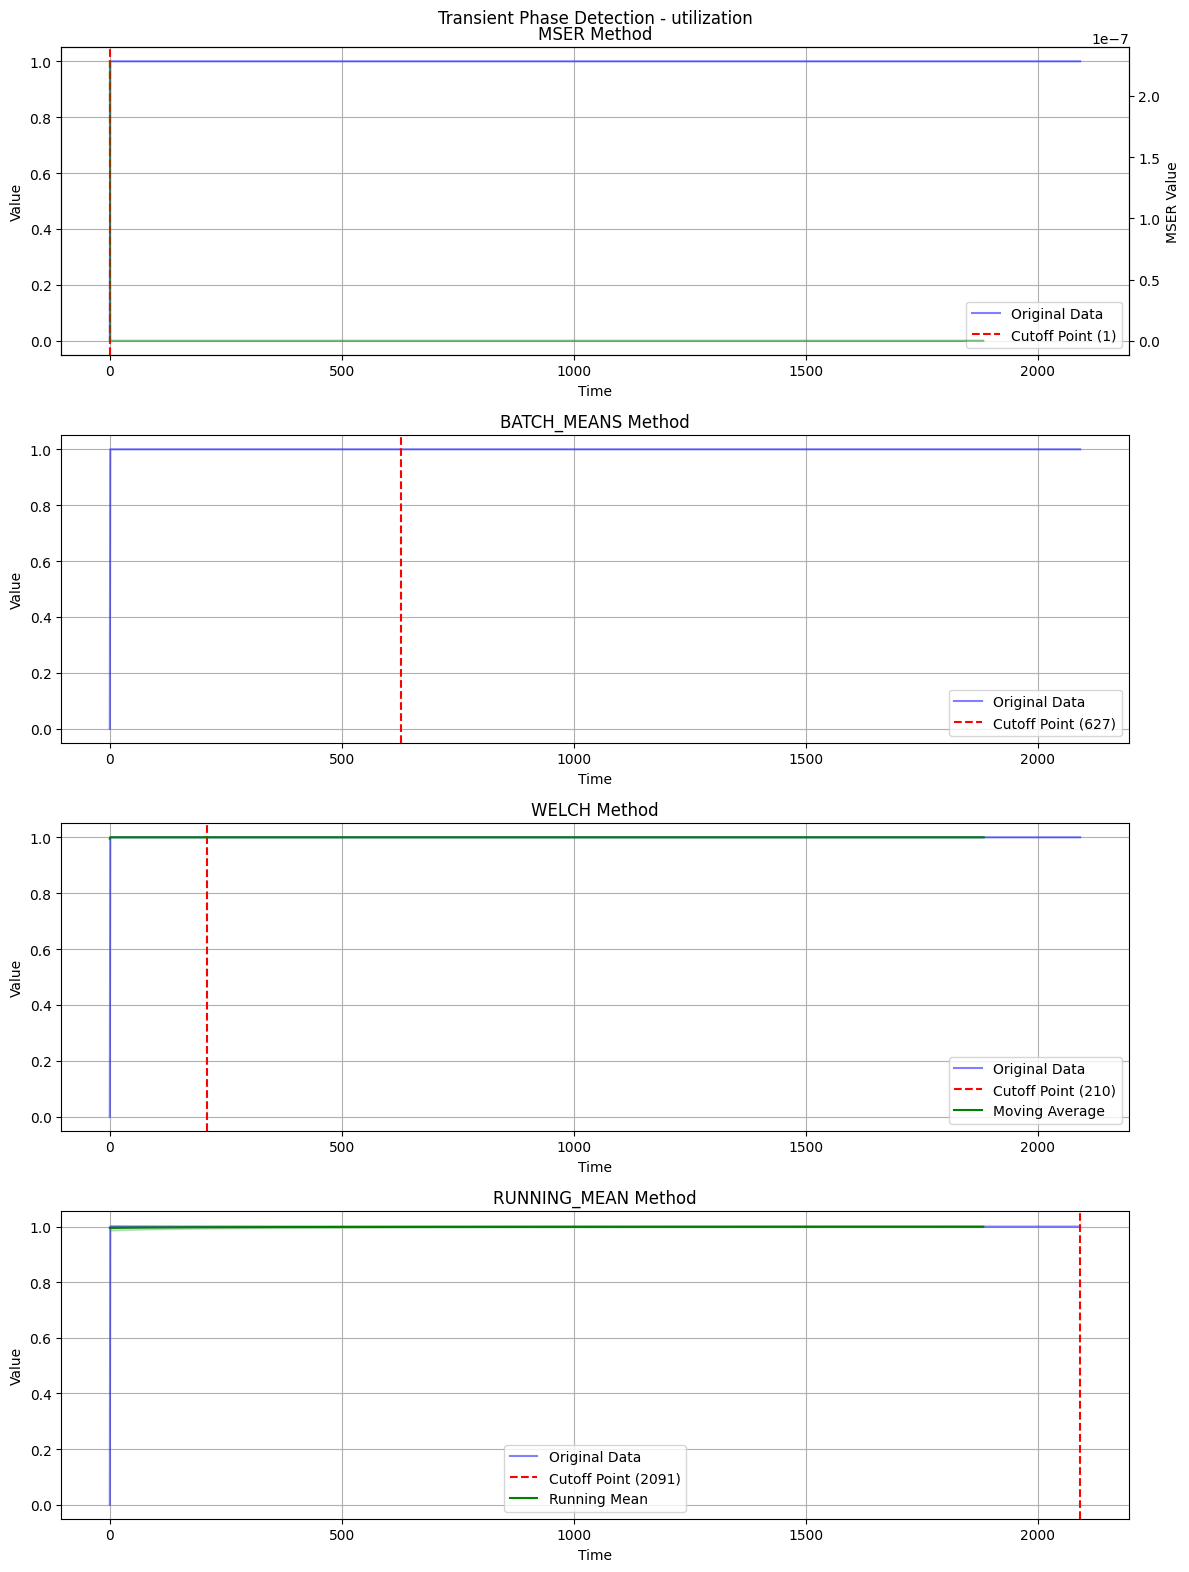

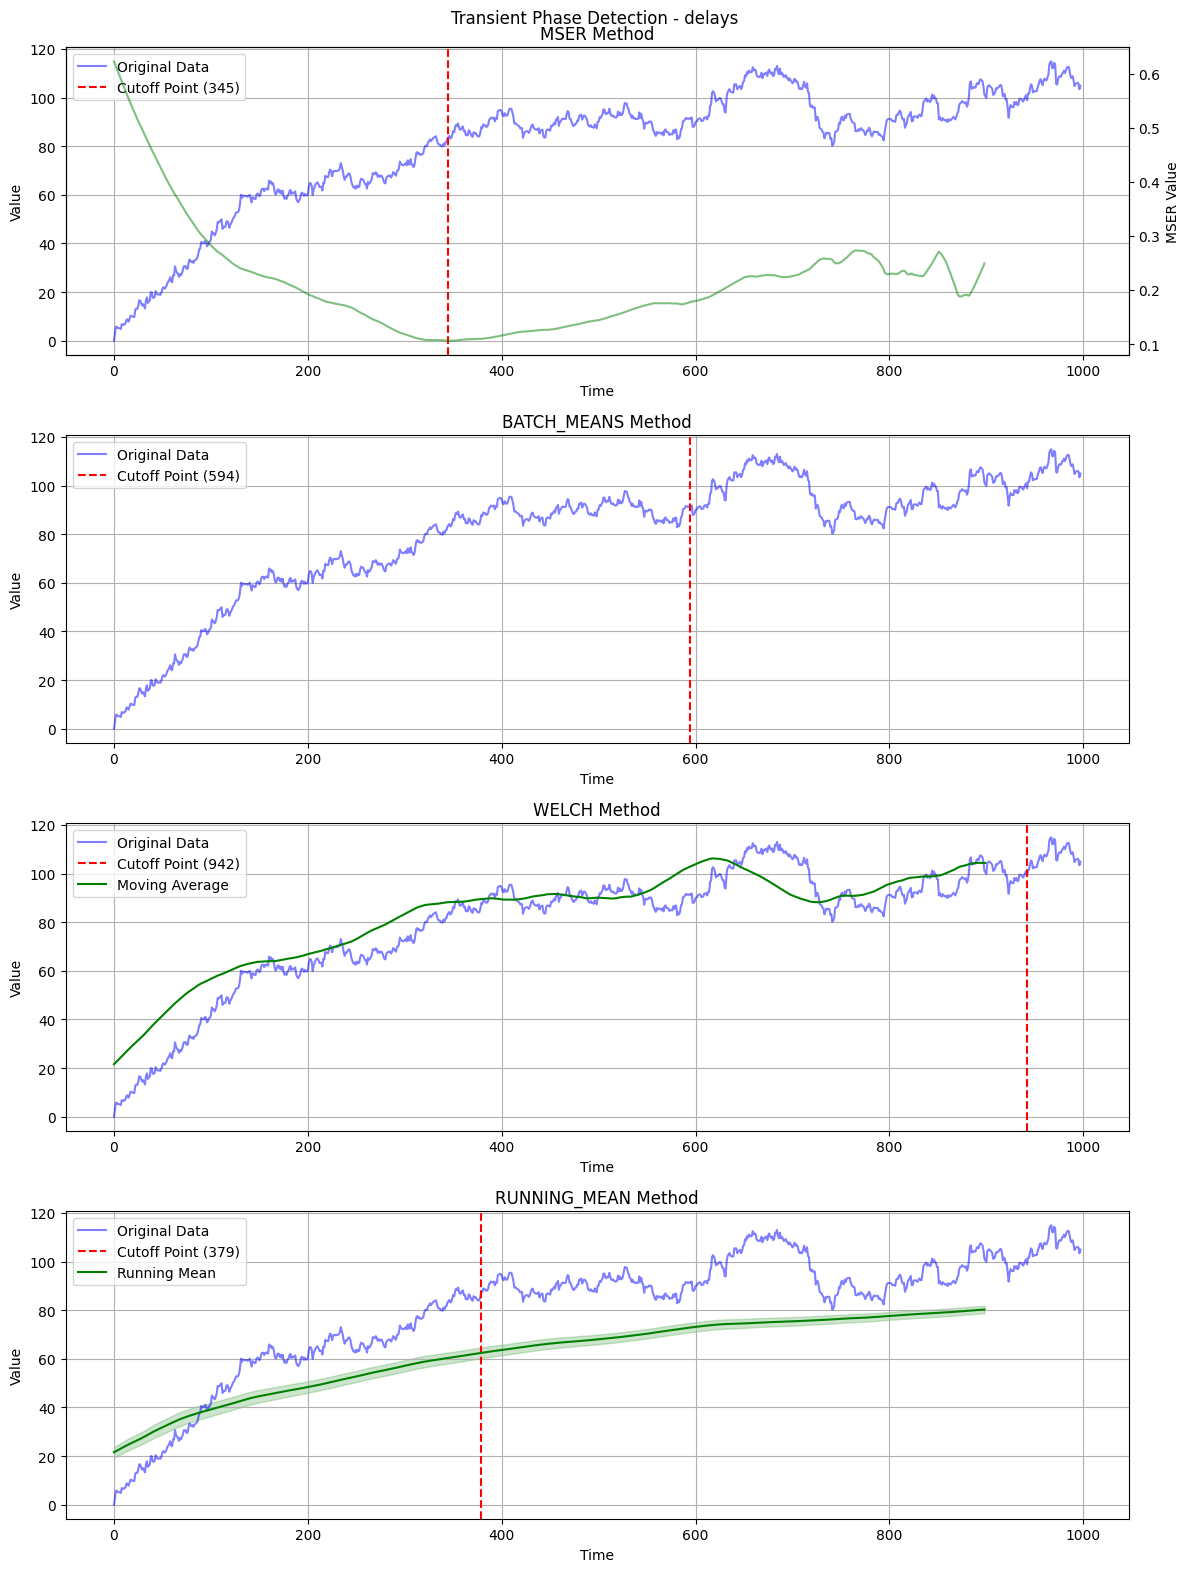

Queue size transient phase ends at: 906
Server utilization transient phase ends at: 210


In [2]:
# Create and run your simulator
simulator = MultiServerQueueSimulator_with_initial_queue(
    num_servers=1,
    queue_capacity=100,
    arrival_rate=1.2,
    service_rate=1,
    simulation_time=1000,
    initial_queue_size=0
)
simulator.run()

# Create transient detector
detector = TransientPhaseDetector(confidence_level=0.95)

# Analyze different metrics from your simulation
metrics_to_analyze = {
    'queue_size': [size for _, size in simulator.metrics['transient_metrics']['queue_sizes_over_time']],
    'utilization': [util for _, util in simulator.metrics['transient_metrics']['server_utilization_over_time']],
    'delays': simulator.metrics['delays']
}

# Analyze system stability
results = detector.analyze_system_stability(metrics_to_analyze)

# Access results for specific metrics and methods
queue_cutoff = results['queue_size']['mser']['cutoff_point']
utilization_cutoff = results['utilization']['welch']['cutoff_point']
print(f"Queue size transient phase ends at: {queue_cutoff}")
print(f"Server utilization transient phase ends at: {utilization_cutoff}")


Running scenario: M/M/1 Queue (λ=0.8, μ=1, N(0)=1000)

-------------------- M/M/1 Queue (λ=0.8, μ=1, N(0)=1000) --------------------


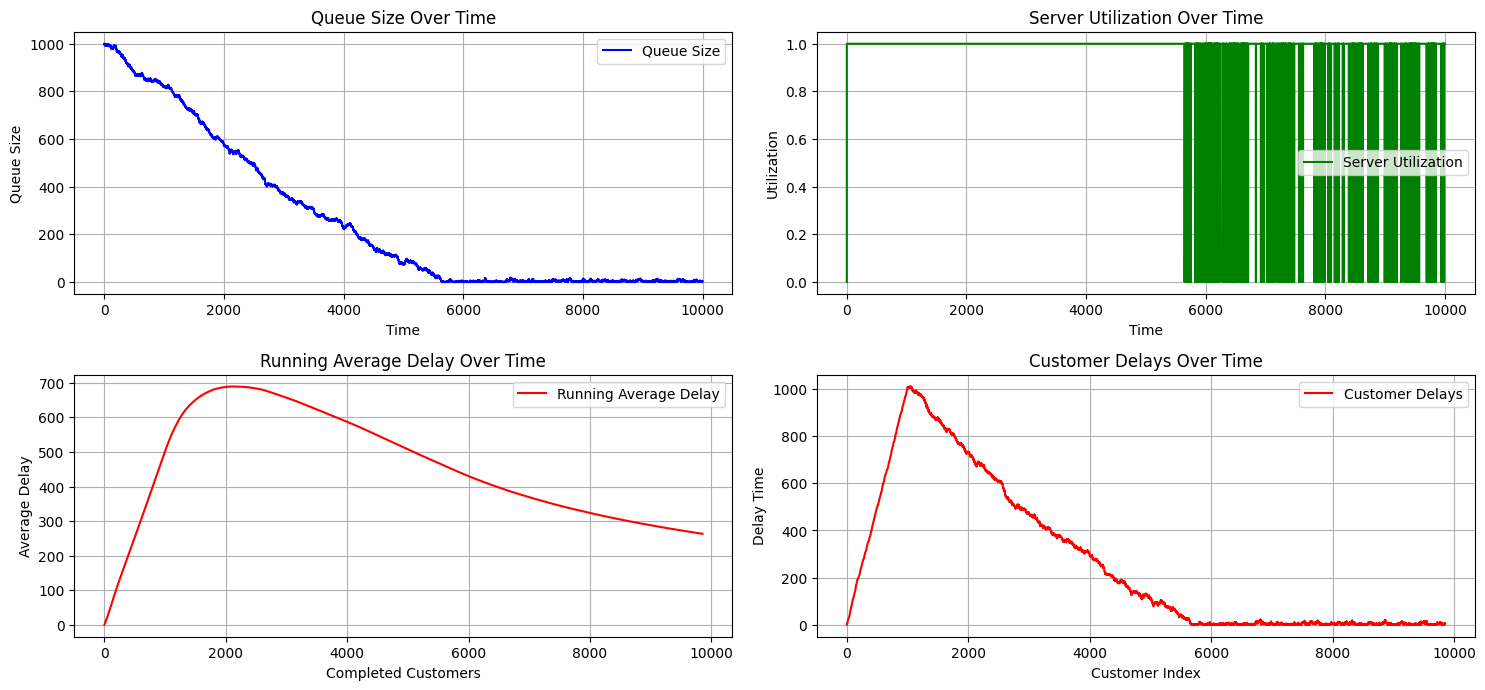


Simulation Summary

Overall Statistics:
Total customers: 1000
Completed customers: 9232
Rejected customers: 0
Active customers: 1000
Average delay: 263.61 ± 313.63 time units

Server Utilization:
Final utilization: 1.00
Average utilization: 0.96

Queue Statistics:
Average queue size: 266.24
Maximum queue size: 1000


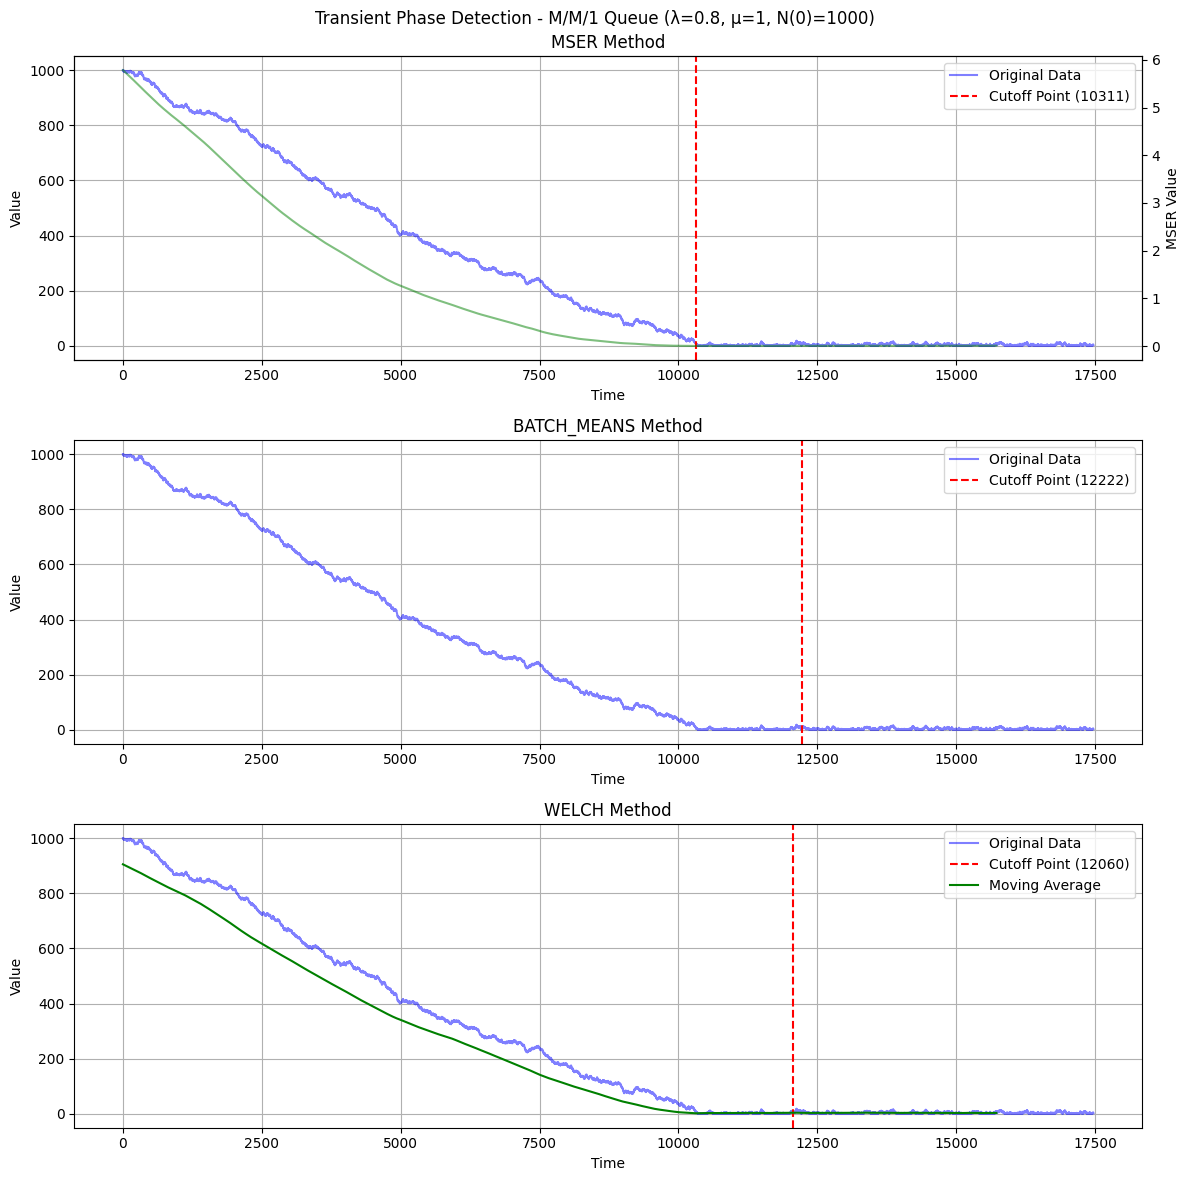


Transient phase detection results:
MSER: Cutoff point at t = 10311
BATCH_MEANS: Cutoff point at t = 12222
WELCH: Cutoff point at t = 12060

Running scenario: M/M/1/K Queue (λ=1.2, μ=1, K=10000, N(0)=0)

-------------------- M/M/1/K Queue (λ=1.2, μ=1, K=10000, N(0)=0) --------------------


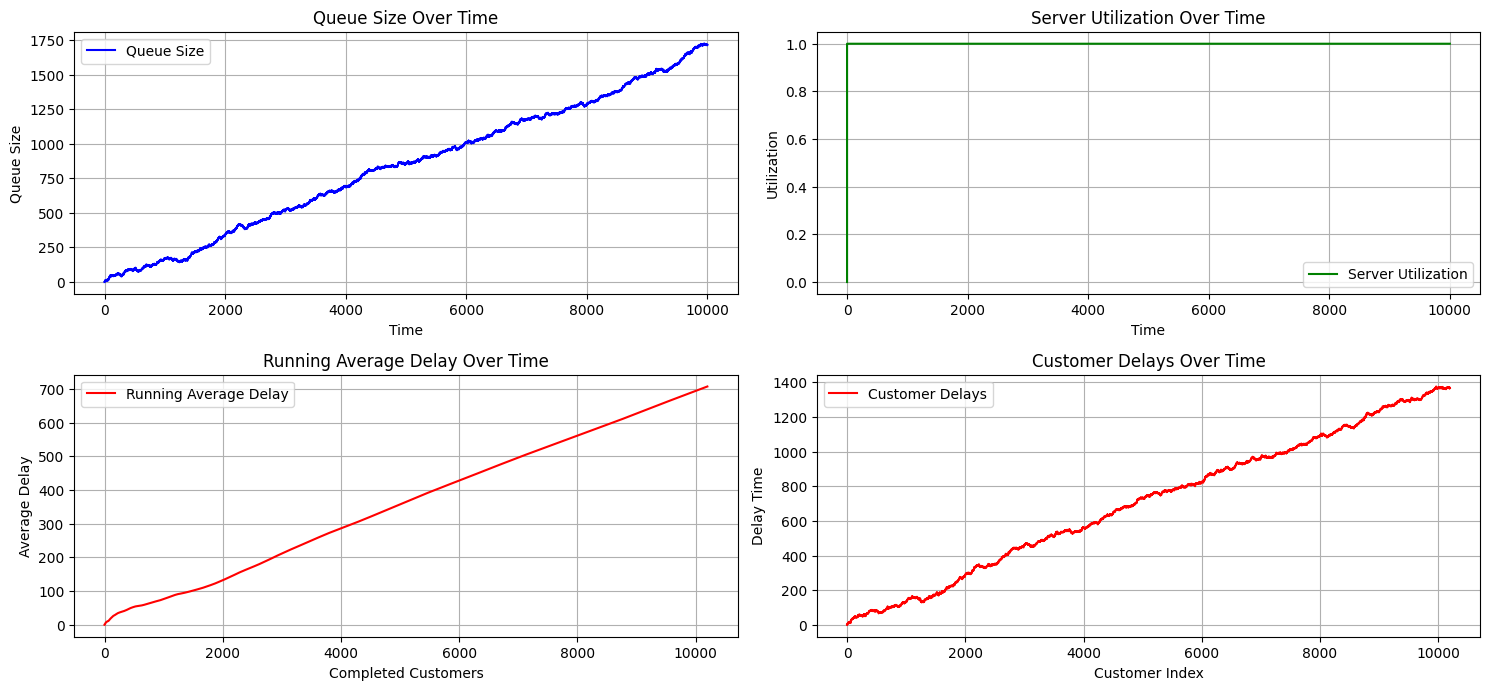


Simulation Summary

Overall Statistics:
Total customers: 0
Completed customers: 10196
Rejected customers: 0
Active customers: 0
Average delay: 707.55 ± 398.18 time units

Server Utilization:
Final utilization: 1.00
Average utilization: 1.00

Queue Statistics:
Average queue size: 843.99
Maximum queue size: 1723


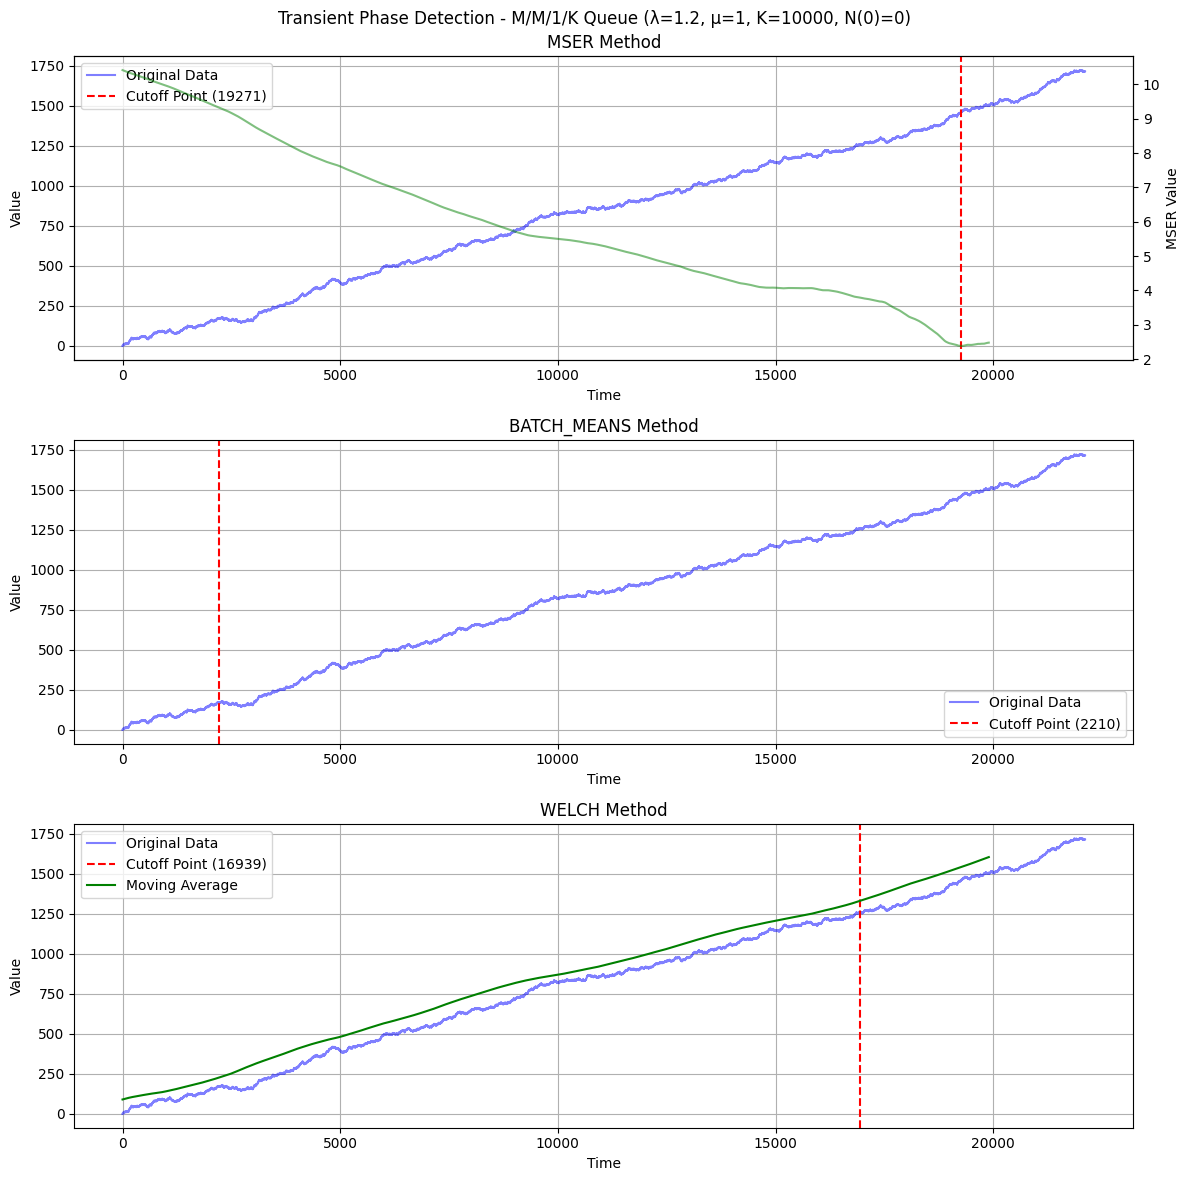


Transient phase detection results:
MSER: Cutoff point at t = 19271
BATCH_MEANS: Cutoff point at t = 2210
WELCH: Cutoff point at t = 16939

Running scenario: M/M/1 Queue (λ=0.8, μ=1, N(0)=0)

-------------------- M/M/1 Queue (λ=0.8, μ=1, N(0)=0) --------------------


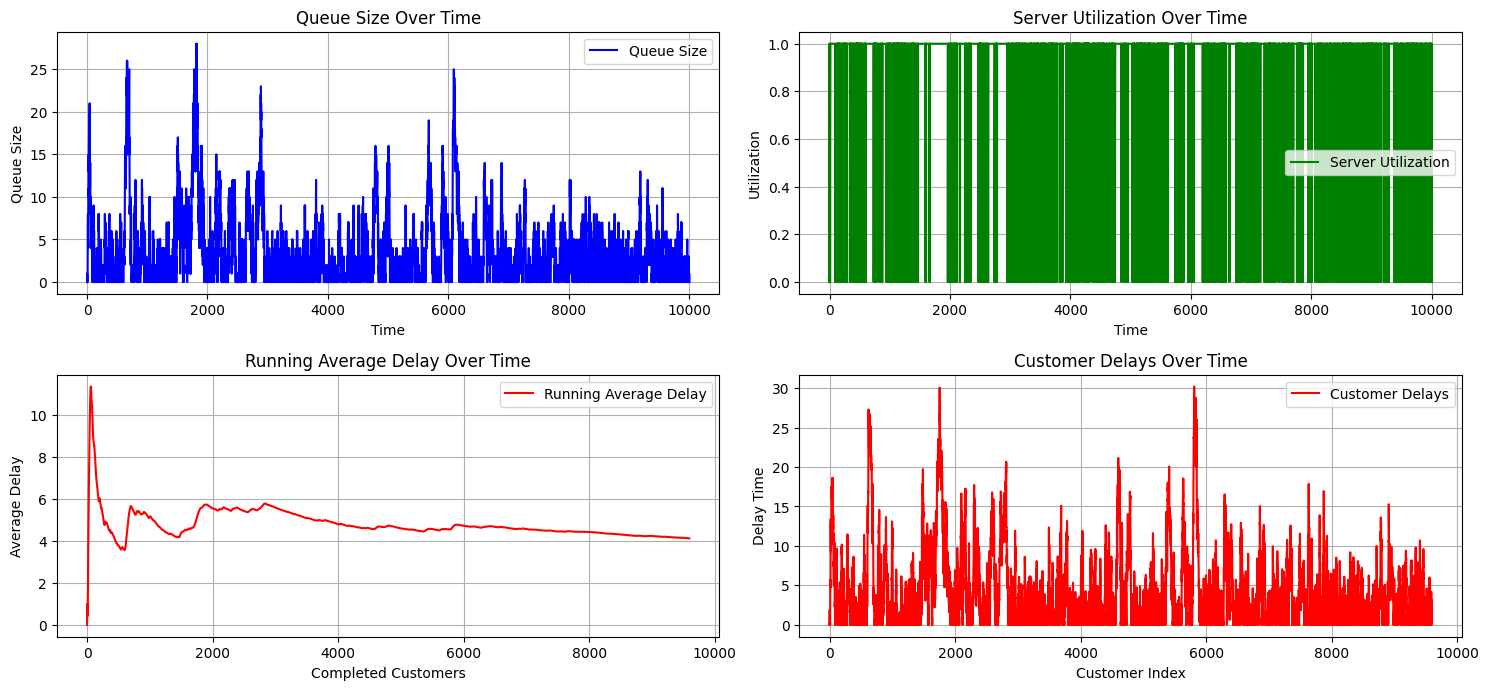


Simulation Summary

Overall Statistics:
Total customers: 0
Completed customers: 8002
Rejected customers: 0
Active customers: 0
Average delay: 4.12 ± 4.82 time units

Server Utilization:
Final utilization: 0.00
Average utilization: 0.90

Queue Statistics:
Average queue size: 3.71
Maximum queue size: 28


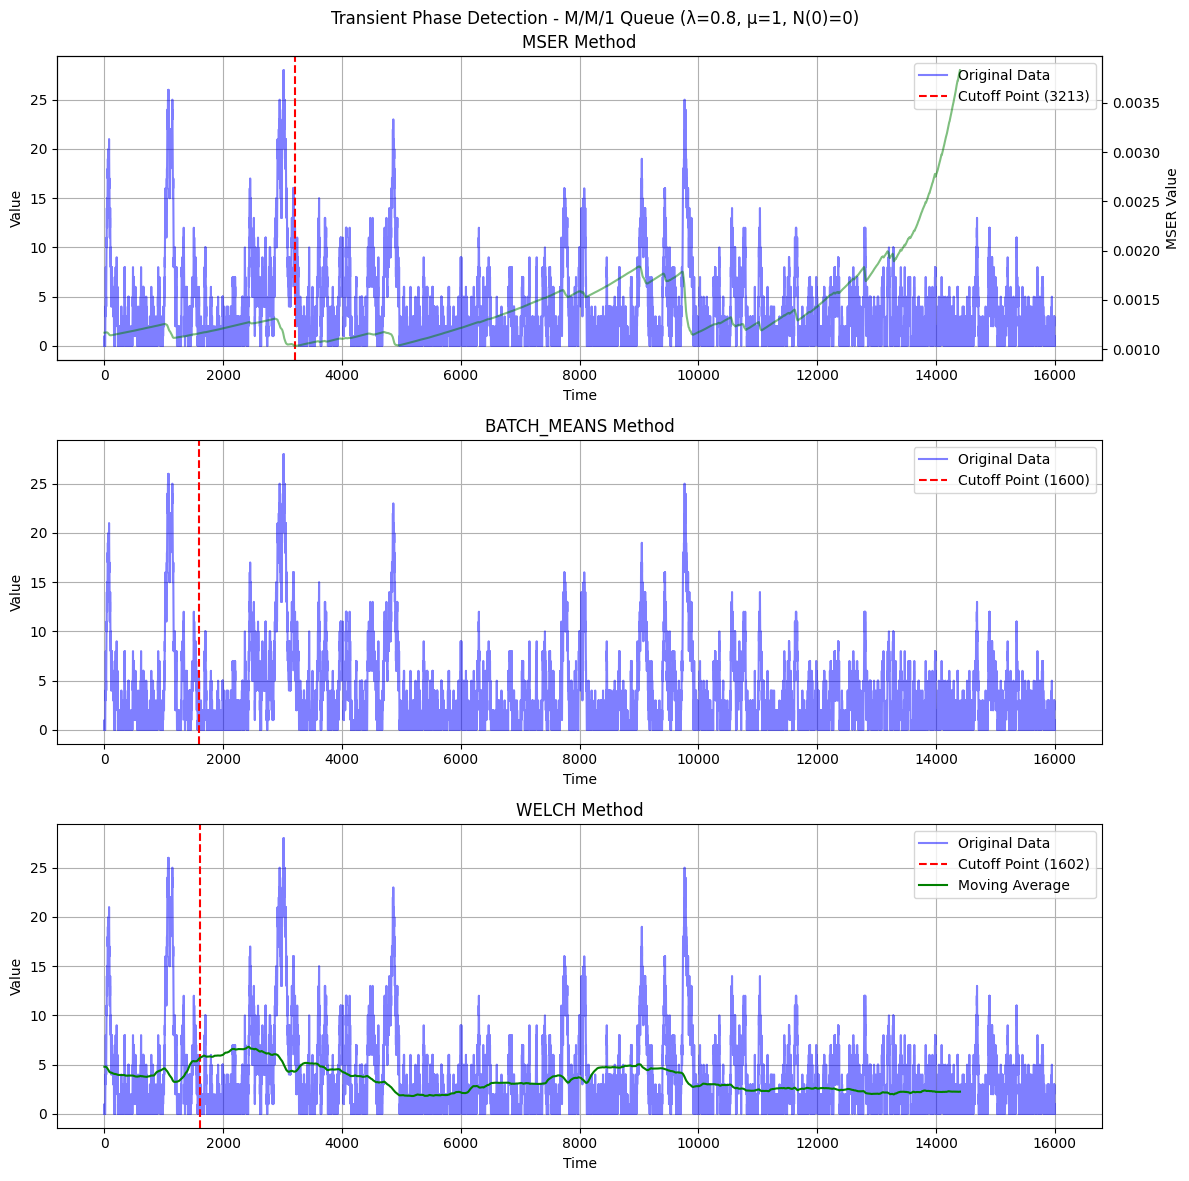


Transient phase detection results:
MSER: Cutoff point at t = 3213
BATCH_MEANS: Cutoff point at t = 1600
WELCH: Cutoff point at t = 1602


In [3]:
import numpy as np
from transit import MultiServerQueueSimulator_with_initial_queue, TransientPhaseDetector

def run_queue_scenario(scenario_params, name):
    """
    Run a specific queue scenario and analyze its transient phase.
    """
    print(f"\n{'-'*20} {name} {'-'*20}")
    
    # Create and run simulator
    simulator = MultiServerQueueSimulator_with_initial_queue(
        num_servers=1,
        queue_capacity=scenario_params['capacity'],
        arrival_rate=scenario_params['lambda'],
        service_rate=scenario_params['mu'],
        simulation_time=10000,  # Long enough to reach steady state
        initial_queue_size=scenario_params['initial_size']
    )
    
    simulator.run()
    
    # Extract time series for analysis
    queue_sizes = [size for _, size in simulator.metrics['transient_metrics']['queue_sizes_over_time']]
    
    # Analyze transient phase
    detector = TransientPhaseDetector(confidence_level=0.95)
    results = detector.detect_transient_phase(
        queue_sizes,
        methods=['mser', 'batch_means', 'welch'],
        window_size=len(queue_sizes)//10
    )
    
    # Plot results with all methods
    detector.plot_results(queue_sizes, results, 
                         title=f"Transient Phase Detection - {name}")
    
    return simulator, results

# Define scenarios
scenarios = {
    'MM1_Initial1000': {
        'name': 'M/M/1 Queue (λ=0.8, μ=1, N(0)=1000)',
        'params': {
            'lambda': 0.8,
            'mu': 1.0,
            'capacity': float('inf'),  # Infinite capacity
            'initial_size': 1000
        }
    },
    'MM1K': {
        'name': 'M/M/1/K Queue (λ=1.2, μ=1, K=10000, N(0)=0)',
        'params': {
            'lambda': 1.2,
            'mu': 1.0,
            'capacity': 10000,
            'initial_size': 0
        }
    },
    'MM1_Initial0': {
        'name': 'M/M/1 Queue (λ=0.8, μ=1, N(0)=0)',
        'params': {
            'lambda': 0.8,
            'mu': 1.0,
            'capacity': float('inf'),
            'initial_size': 0
        }
    }
}

# Run all scenarios
if __name__ == "__main__":
    np.random.seed(42)  # For reproducibility
    
    results_dict = {}
    for scenario_id, scenario in scenarios.items():
        print(f"\nRunning scenario: {scenario['name']}")
        simulator, results = run_queue_scenario(scenario['params'], scenario['name'])
        results_dict[scenario_id] = {
            'simulator': simulator,
            'transient_results': results
        }
        
        # Print summary statistics
        print("\nTransient phase detection results:")
        for method, result in results.items():
            if 'cutoff_point' in result:
                print(f"{method.upper()}: Cutoff point at t = {result['cutoff_point']}")

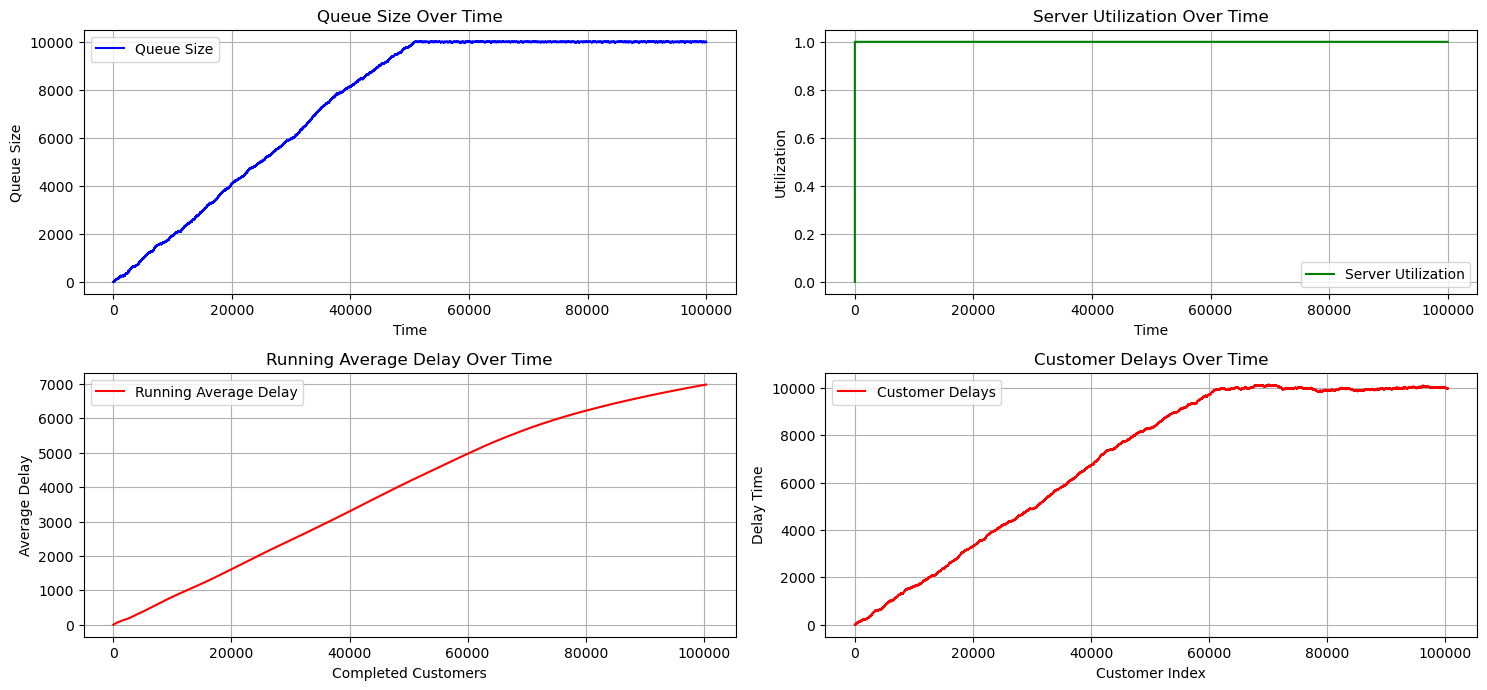


Simulation Summary

Overall Statistics:
Total customers: 0
Completed customers: 100390
Rejected customers: 9755
Active customers: 0
Average delay: 6984.51 ± 3317.53 time units

Server Utilization:
Final utilization: 1.00
Average utilization: 1.00

Queue Statistics:
Average queue size: 7349.66
Maximum queue size: 10000


c:\Users\Admin\anaconda33\lib\site-packages\numpy\core\fromnumeric.py:3715: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\Admin\anaconda33\lib\site-packages\numpy\core\_methods.py:257: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


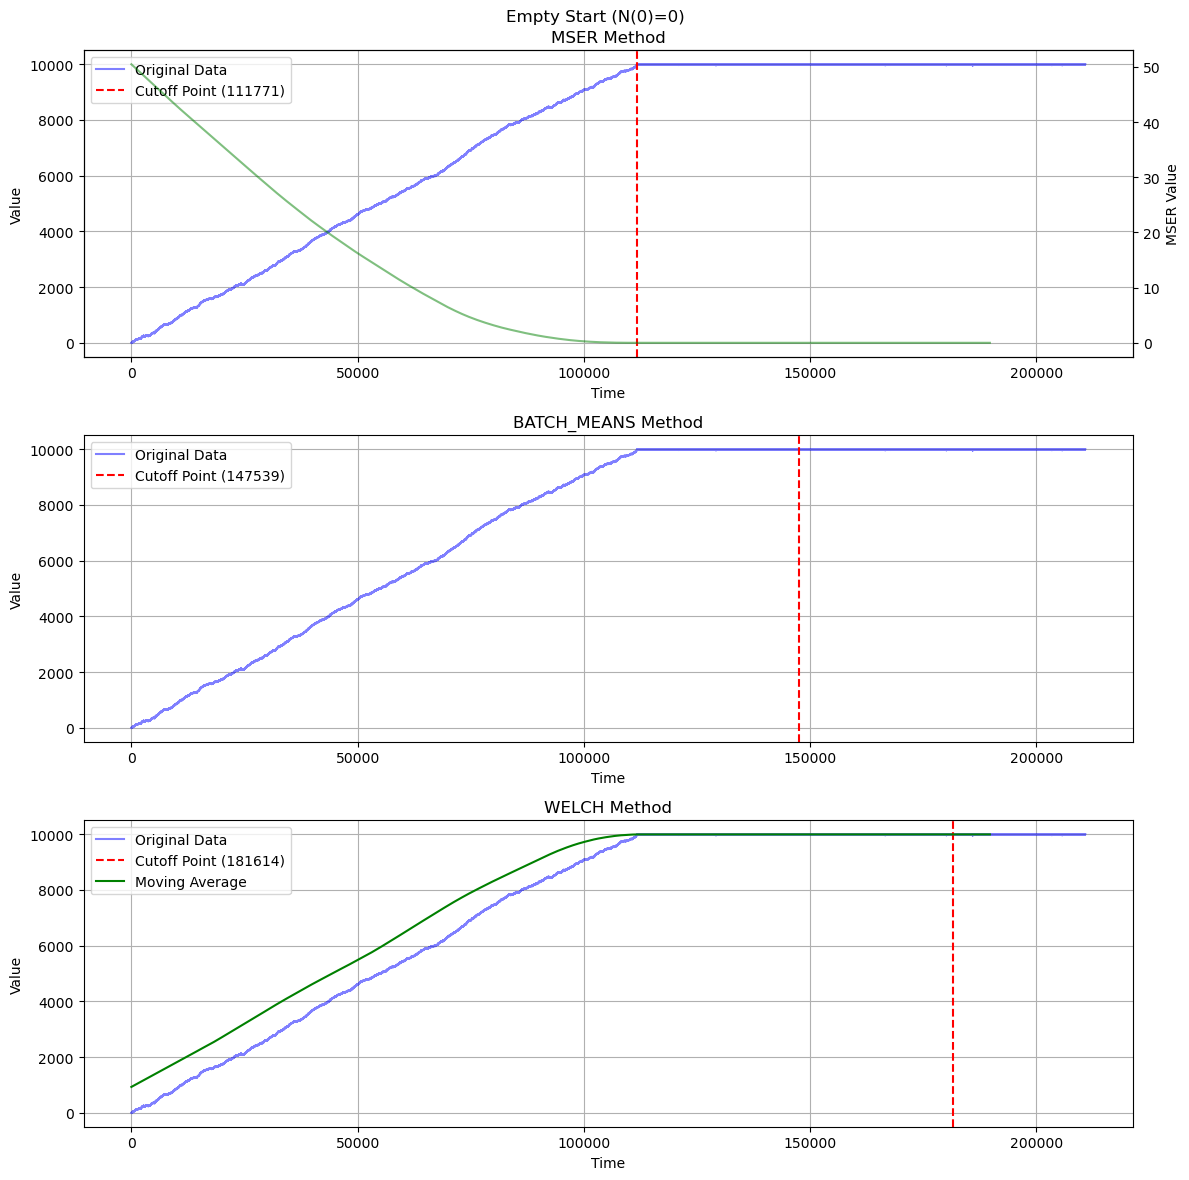

In [4]:
# Create simulator with your specified parameters
simulator = MultiServerQueueSimulator_with_initial_queue(
    num_servers=1,              # M/M/1 queue
    queue_capacity=10000,       # K = 10000
    arrival_rate=1.2,          # λ = 1.2
    service_rate=1.0,          # μ = 1.0
    simulation_time=100000,     # Run long enough to see steady state
    initial_queue_size=0       # N(0) = 0
)

# Run the simulation
simulator.run()
# Create transient detector
# Analyze transient phase for both cases
detector = TransientPhaseDetector()

# Get queue length data
empty_queue_sizes = [size[1] for size in simulator.metrics['transient_metrics']['queue_sizes_over_time']]

# Detect transient phase
results_empty = detector.detect_transient_phase(empty_queue_sizes)

# Plot results
detector.plot_results(empty_queue_sizes, results_empty, "Empty Start (N(0)=0)")

KeyboardInterrupt: 

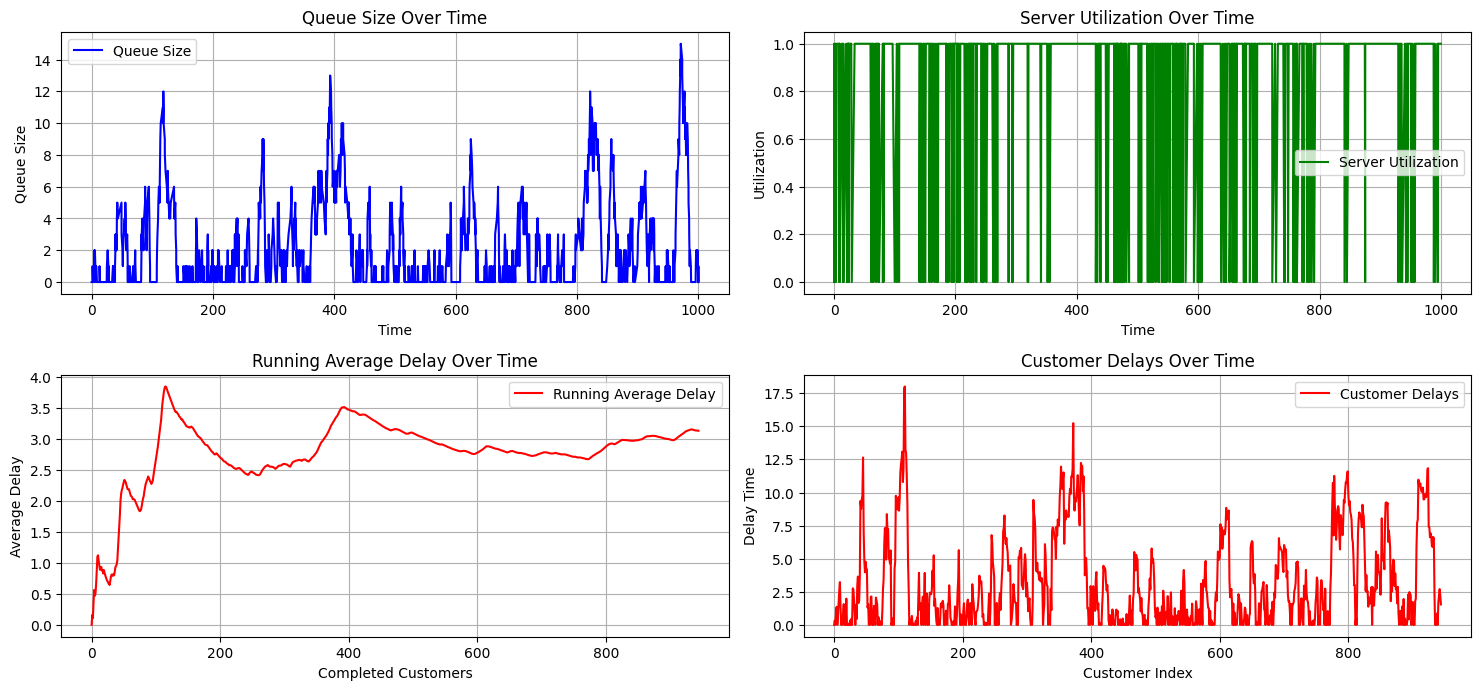


Simulation Summary

Overall Statistics:
Total customers: 0
Completed customers: 765
Rejected customers: 0
Active customers: 0
Average delay: 3.13 ± 3.38 time units

Server Utilization:
Final utilization: 1.00
Average utilization: 0.88

Queue Statistics:
Average queue size: 2.65
Maximum queue size: 15


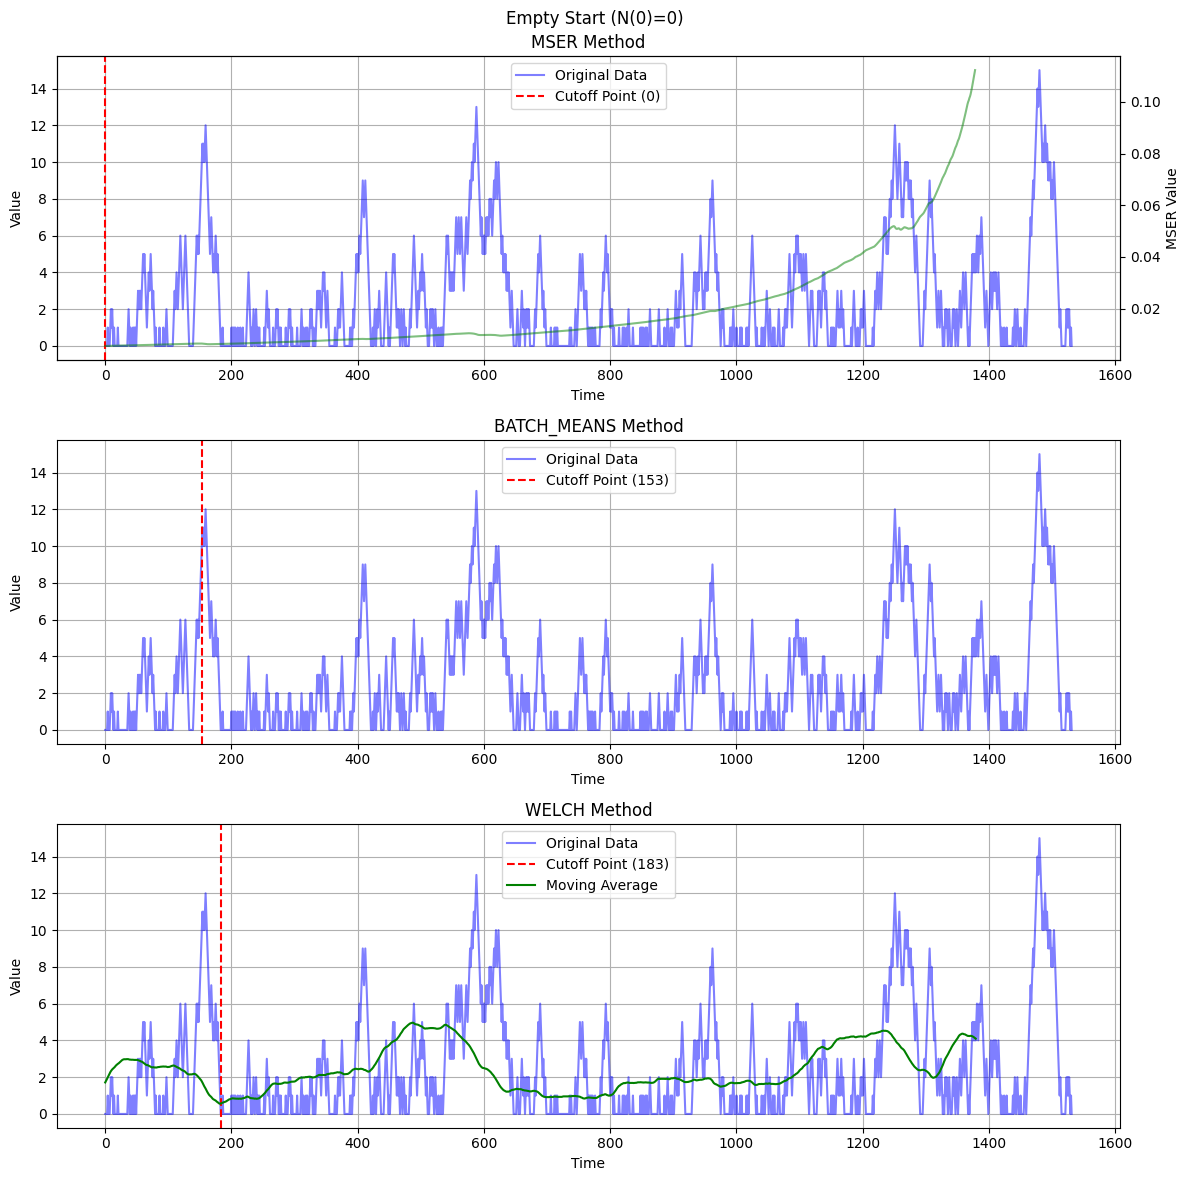

In [15]:
import random
import numpy as np
from transit import MultiServerQueueSimulator_with_initial_queue, TransientPhaseDetector

# Set random seed for reproducibility
random.seed(42)

# Case 1: Empty start
simulator_empty = MultiServerQueueSimulator_with_initial_queue(
    num_servers=1,
    queue_capacity=1000,
    arrival_rate=0.8,
    service_rate=1.0,
    simulation_time=1000,
    initial_queue_size=0
)

# Run both simulations
simulator_empty.run()

# Analyze transient phase for both cases
detector = TransientPhaseDetector()

# Get queue length data
empty_queue_sizes = [size[1] for size in simulator_empty.metrics['transient_metrics']['queue_sizes_over_time']]

# Detect transient phase
results_empty = detector.detect_transient_phase(empty_queue_sizes)

# Plot results
detector.plot_results(empty_queue_sizes, results_empty, "Empty Start (N(0)=0)")
